Alberto Geroldi 968236
# <span style="color:green">Numerical simulation laboratory (NSL)</span>

# Exercise 1

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math

We use the <b>blocking method</b> to compute the statistical uncertainties.  
Simulation returns <span style="color:red">N blocks</span> values for estimated quantities (mean, variance, chi squared).  
Quantities comes from a mean over <span style="color:red">N throws</span> random numbers.



In [2]:
def error(AV,AV2,n):
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

In [3]:
def blocks(data_file):
    sum1 = 0.
    sum2 = 0.
    y_val = np.zeros((len(data_file), 2))
    for ix in range(len(data_file)):
        sum1 += data_file[ix]
        sum2 += data_file[ix] * data_file[ix]
        AV = sum1 / (ix + 1)
        AV2 = sum2 / (ix + 1)
        y_val[ix,0] = AV
        y_val[ix,1] = error(AV,AV2,ix)
    return y_val

## EX 1.1

Test pseudo-RNG

In [4]:
file_blocks = open("data/N_data_1_1.txt", 'r')
file_lines = file_blocks.readlines()
N_blocks = int(file_lines[0])
N_throws = int(file_lines[1])
print(f"N blocks = {N_blocks}")
print(f"N throws = {N_throws}")

#Read data from file (mean, variance , chi squared)
data = np.loadtxt("data/1_1_data.txt")

N blocks = 100
N throws = 10000


# Mean Value

Picture of the estimation of $\langle r \rangle$ and its uncertainty.  
The mean value in the $[0,1)$ range is:  
$$\langle r \rangle = \frac{1}{2}$$



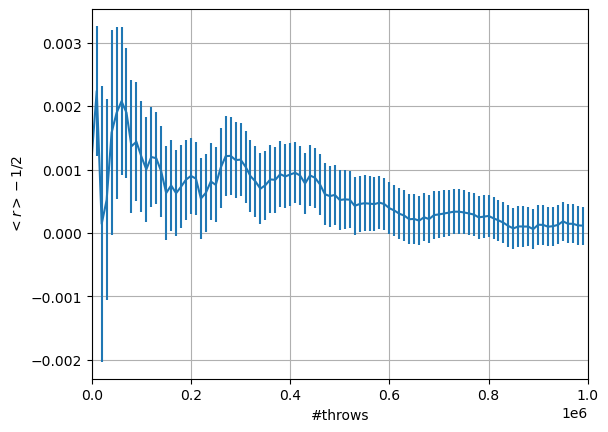

<r>-1/2 = 1e-04 ± 3e-04


In [5]:
x = np.arange(N_blocks)*N_throws
y = blocks(data[:,0])
plt.errorbar(x, y[:,0]-0.5, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.xlim(0, 1e6)
plt.ylabel(r"$<r>-1/2$")
plt.grid(True)
plt.show()
#print mean value and std dev
print(f"<r>-1/2 = {y[-1,0]-0.5:.0e} ± {y[-1,1]:.0e}")

# Variance

We compare variance to its expected value:  
$$\langle \sigma^{2} \rangle = \left\langle \left(r - \frac{1}{2}\right)^{2} \right\rangle = \frac{1}{12} $$

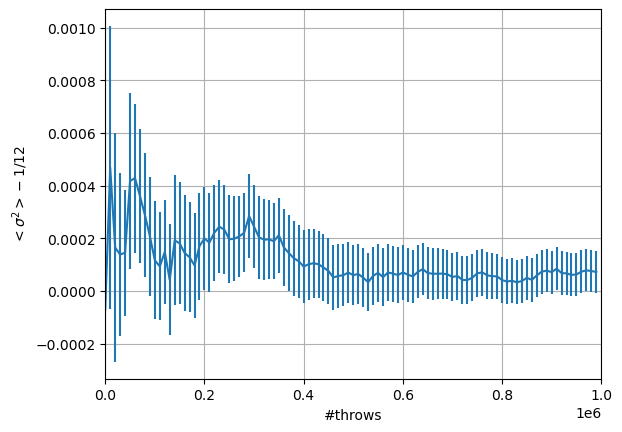

<sigma^2>-1/12 = 7e-05 ± 8e-05


In [6]:
x = np.arange(N_blocks)*N_throws
y = blocks(data[:,1])
plt.errorbar(x, y[:,0] - 1/12, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.xlim(0, 1e6)
plt.ylabel(r"$<\sigma^2>-1/12$")
plt.grid(True)
plt.show()
#print mean value and std dev
print(f"<sigma^2>-1/12 = {y[-1,0] - 1/12:.0e} ± {y[-1,1]:.0e}")

# $\chi^2$ 

The hypothesis is that the numbers $r$ are drawn from a uniform distribution.  
We can try to estimate the probability that $r$ are not drawn from a uniform distribution.  
Finally for this task we calculate the reduced chi squared  
$$\tilde{\chi}^2 = \frac{\chi^2}{100}$$  
and if it will be approximately equal to 1 it will be unlikely that the numbers are not sampled from a uniform distribution

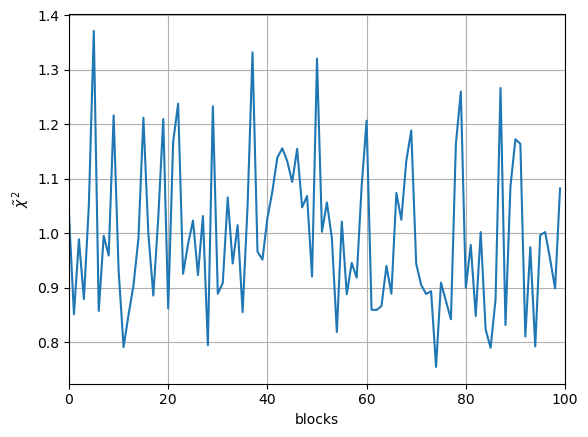

In [7]:
x = np.arange(N_blocks)
y_rchi2 = data[:,2]/100
plt.plot(x, y_rchi2)
plt.xlabel(r"blocks")
plt.xlim(0, 100)
plt.ylabel(r"$\tilde\chi^2$")
plt.grid(True)
plt.show()

## EX 1.2

We check the Central Limit Theorem for different probability distributions by using the method of the inversion of the cumulative distribution.  
We sample with N blocks = 1, 2, 10, 100 for each distribution

In [8]:
file_sums = open("data/N_data_1_2.txt", 'r')
file_l = file_sums.readlines()
N_thr = int(file_l[0])
N_sum1 = int(file_l[1])
N_sum2 = int(file_l[2])
N_sum3 = int(file_l[3])
N_sum4 = int(file_l[4])
N_sum_tot = [N_sum1,N_sum2,N_sum3,N_sum4]
print(f"N blocks = {N_thr}")
print(f"N sum1 = {N_sum1}")
print(f"N sum2 = {N_sum2}")
print(f"N sum3 = {N_sum3}")
print(f"N sum4 = {N_sum4}")
#Read data from file (different distributions)
data_uniform = np.loadtxt("data/1_2_uniform.txt")
data_exp = np.loadtxt("data/1_2_exp.txt")
data_cauchy = np.loadtxt("data/1_2_cauchy.txt")

N blocks = 10000
N sum1 = 1
N sum2 = 2
N sum3 = 10
N sum4 = 100


# Uniform distribution

Sum of variables uniformly distributed like a six-sided dice. The limit of the sum is a gaussian distribution.

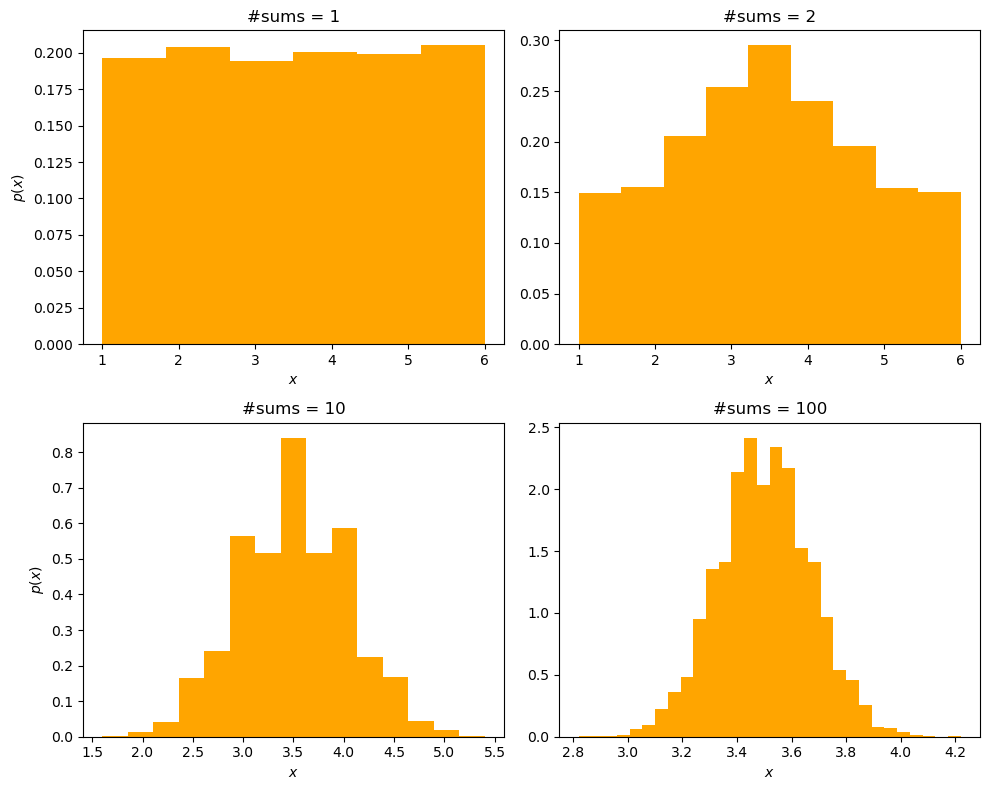

In [9]:
n_bins = [6, 9, 15, 30]
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0.hist(data_uniform[:,0], n_bins[0], density=True, histtype='bar', color='orange')
ax0.set_xlabel("$x$", fontweight ='bold')
ax0.set_ylabel("$p(x)$", fontweight ='bold')
ax0.set_title(f"#sums = {N_sum_tot[0]}")
ax1.hist(data_uniform[:,1], n_bins[1], density=True, histtype='bar', color='orange')
ax1.set_xlabel("$x$", fontweight ='bold')
ax1.set_title(f"#sums = {N_sum_tot[1]}")
ax2.hist(data_uniform[:,2], n_bins[2], density=True, histtype='bar', color='orange')
ax2.set_xlabel("$x$", fontweight ='bold')
ax2.set_ylabel("$p(x)$", fontweight ='bold')
ax2.set_title(f"#sums = {N_sum_tot[2]}")
ax3.hist(data_uniform[:,3], n_bins[3], density=True, histtype='bar', color='orange')
ax3.set_xlabel("$x$", fontweight ='bold')
ax3.set_title(f"#sums = {N_sum_tot[3]}")

fig.tight_layout()
plt.show()

# Exponential distribution

$p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ with $\lambda = 1$.(exponential dice)  
The limit of the sum is a Gaussian distribution.

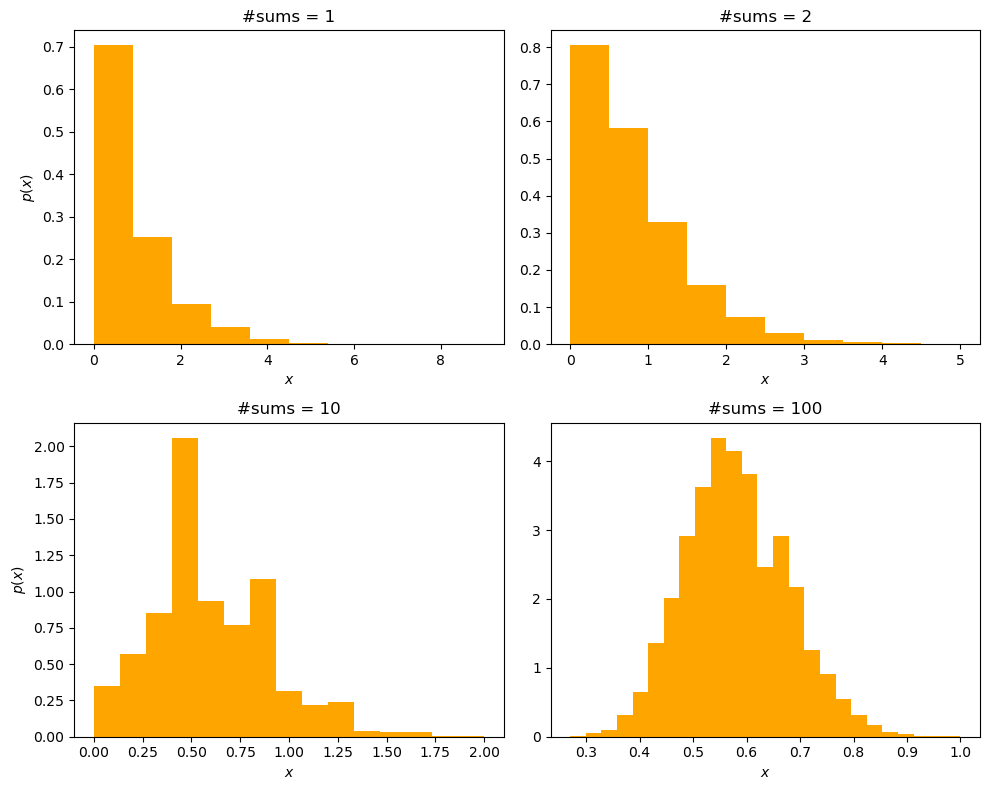

In [10]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0.hist(data_exp[:,0], 10, density=True, histtype='bar', color='orange')
ax0.set_xlabel("$x$", fontweight ='bold')
ax0.set_ylabel("$p(x)$", fontweight ='bold')
ax0.set_title(f"#sums = {N_sum_tot[0]}")
ax1.hist(data_exp[:,1], 10, density=True, histtype='bar', color='orange')
ax1.set_xlabel("$x$", fontweight ='bold')
ax1.set_title(f"#sums = {N_sum_tot[1]}")
ax2.hist(data_exp[:,2], 15, density=True, histtype='bar', color='orange')
ax2.set_xlabel("$x$", fontweight ='bold')
ax2.set_ylabel("$p(x)$", fontweight ='bold')
ax2.set_title(f"#sums = {N_sum_tot[2]}")
ax3.hist(data_exp[:,3], 25, density=True, histtype='bar', color='orange')
ax3.set_xlabel("$x$", fontweight ='bold')
ax3.set_title(f"#sums = {N_sum_tot[3]}")

fig.tight_layout()
plt.show()

# Cauchy distribution

We sum variables following a Cauchy-Lorentz distribution with $\mu = 0$ and $\Gamma = 1$.    
$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$  
The limit of the sum is not a Gaussian distribution but a Cauchy distribution (one hypothesis of the CLT is broken: not finite variance).

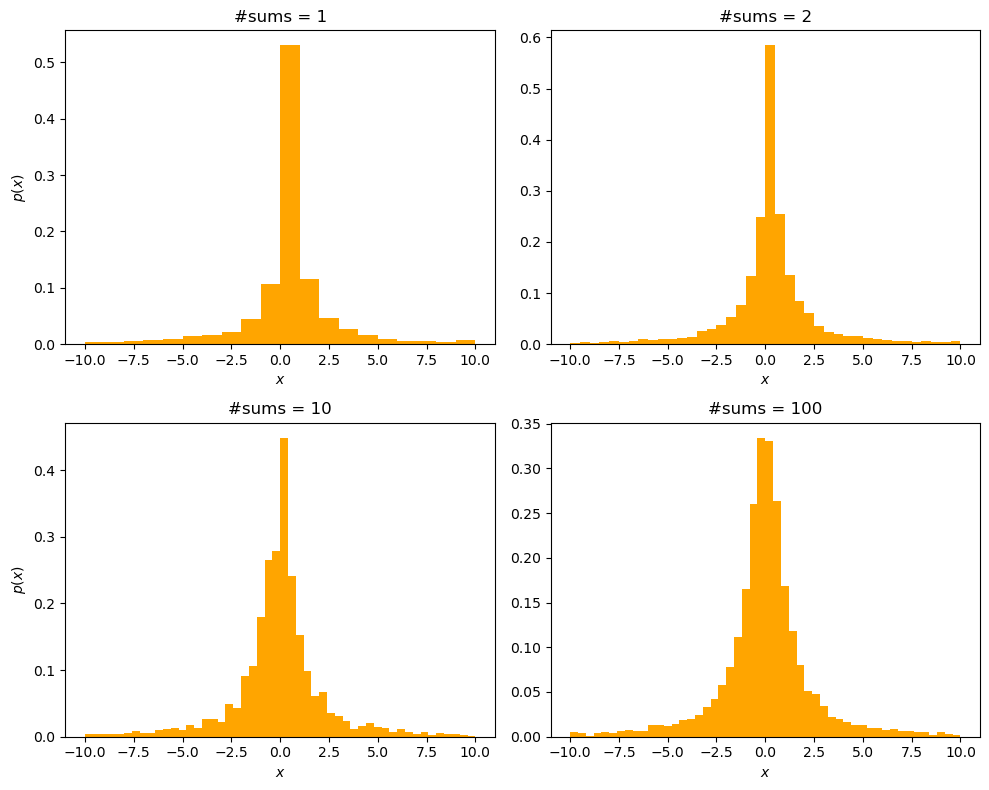

In [11]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0.hist(data_cauchy[:,0], 20, range=(-10, 10), density=True, histtype='bar', color='orange')
ax0.set_xlabel("$x$", fontweight ='bold')
ax0.set_ylabel("$p(x)$", fontweight ='bold')
ax0.set_title(f"#sums = {N_sum_tot[0]}")
ax1.hist(data_cauchy[:,1], 40, range=(-10, 10), density=True, histtype='bar', color='orange')
ax1.set_xlabel("$x$", fontweight ='bold')
ax1.set_title(f"#sums = {N_sum_tot[1]}")
ax2.hist(data_cauchy[:,2], 50, range=(-10, 10), density=True, histtype='bar', color='orange')
ax2.set_xlabel("$x$", fontweight ='bold')
ax2.set_ylabel("$p(x)$", fontweight ='bold')
ax2.set_title(f"#sums = {N_sum_tot[2]}")
ax3.hist(data_cauchy[:,3], 50, range=(-10, 10), density=True, histtype='bar', color='orange')
ax3.set_xlabel("$x$", fontweight ='bold')
ax3.set_title(f"#sums = {N_sum_tot[3]}")

fig.tight_layout()
plt.show()

# EX 1.3

Simulation of Buffon's experiment to estimate $\pi$

In [12]:
# Read parameters from info file
with open("data/N_data_1_3.txt") as file:
    N_blocks = int(file.readline())
    N_throws = int(file.readline())
print(f"N_blocks = {N_blocks}")
print(f"N_throws = {N_throws}")

# Read data
data = np.loadtxt("data/1_3_data.txt")


N_blocks = 100
N_throws = 10000


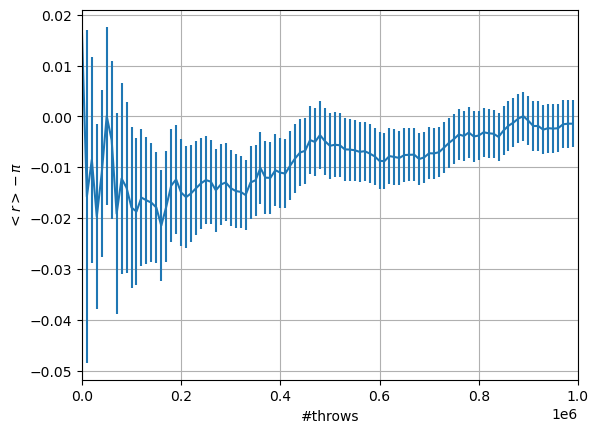

<r> - pi = -1e-03 ± 5e-03


In [13]:
x = np.arange(N_blocks) * N_throws
y = blocks(data)
plt.errorbar(x, y[:,0]-np.pi, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.xlim(0, 1e6)
plt.ylabel(r"$<r> - \pi$")
plt.grid(True)
plt.show()
print(f"<r> - pi = {y[-1,0]-np.pi:.0e} ± {y[-1,1]:.0e}")